In [2]:
# Step 1: Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

In [3]:
plt.style.use('dark_background')

In [4]:
# Step 2: Load the dataset into a pandas dataframe
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Step 3: Preprocess the data
# Separate the input features and target variable
X = data.drop('charges', axis=1)
y = data['charges']

In [6]:
# One-hot encode the categorical features
categorical_features = ['sex', 'smoker', 'region']
categorical_transformer = OneHotEncoder()
numerical_features = ['age', 'bmi', 'children']
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

X = preprocessor.fit_transform(X)

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# # Step 4: Build the neural network model
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1,activation='linear')
# ])

In [9]:
# Step 4: Build the neural network model
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='sigmoid'),
    # Dropout(0.2),
    Dense(64, activation='tanh'),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    # Dropout(0.2),
    Dense(16, activation='relu'),
    # Dropout(0.2),
    Dense(1, activation='linear')
])


In [10]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [11]:
def plot_loss_accuracy(history):
    # Get training loss and accuracy for each epoch
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plotting the training loss and validation loss
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns
    plt.figure(figsize=(8, 6))
    ax[0].plot(train_loss, label='Training Loss')
    ax[0].plot(val_loss, label='Validation Loss')
    ax[0].set_title('Training Loss vs Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
   
    mae=history.history['mae']
    val_mae=history.history['val_mae']
    ax[1].plot(mae,label='Training MAE')
    ax[1].plot(val_mae,label='Validation MAE')
    ax[1].set_title('Training MAE vs Validation MAE')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Mean Absolute Error')
    ax[1].legend()
    plt.show()

In [12]:
# Step 5: Train the model
history = model.fit(X_train, y_train,epochs=500, verbose=0,validation_data=(X_test,y_test),batch_size=64)

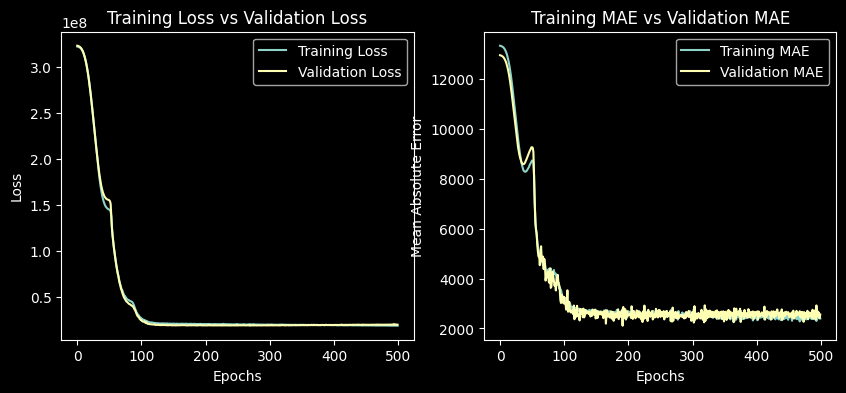

<Figure size 800x600 with 0 Axes>

In [13]:
plot_loss_accuracy(history)

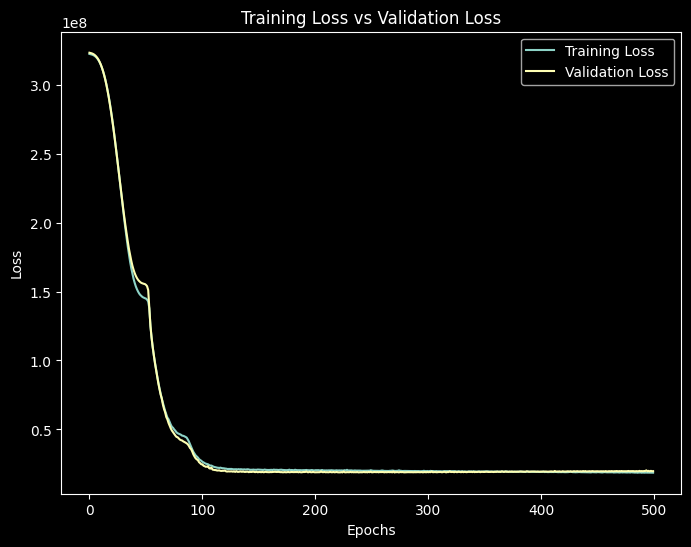

In [14]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# fig, ax = plt.subplots(figsize=(10, 4))  # 1 row, 2 columns
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

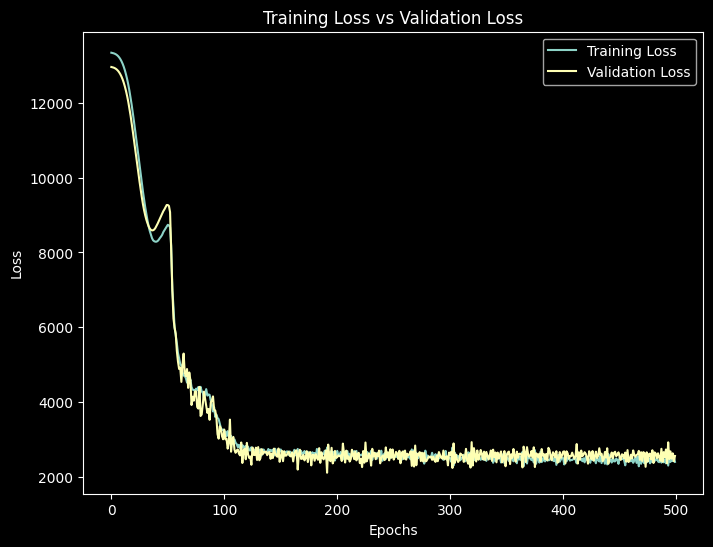

In [22]:
mae=history.history['mae']
val_mae=history.history['val_mae']
# fig, ax = plt.subplots(figsize=(10, 4))  # 1 row, 2 columns
plt.figure(figsize=(8, 6))
plt.plot(mae, label='Training Loss')
plt.plot(val_mae, label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
y_pred=model.predict(X_test)

9/9 [==============================] - 0s 3ms/step


In [24]:
# Step 6: Evaluate the model's performance
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {test_loss:.2f}, Test MAE: {test_mae:.2f}')

Test loss: 19722124.00, Test MAE: 2556.46


In [25]:
r2_score(y_test,y_pred)

0.8729645635967508

In [26]:
rmse =mean_squared_error(y_test,y_pred,squared=False)
print(rmse)

4440.956018258716


In [27]:

# Step 7: Use the trained model to make predictions on new data
new_data = pd.DataFrame({
    'age': [19],
    'sex': ['female'],
    'bmi': [27.9],
    'children': [0],
    'smoker': ['yes'],
    'region': ['southwest']
})
new_data = preprocessor.transform(new_data)
prediction = model.predict(new_data)[0][0]
print('Predicted charges:', prediction)


1/1 [==============================] - 0s 40ms/step
Predicted charges: 17601.012


In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
